# 앙상블
- 여러개의 분류모델을 조합해서 더 나은 성능을 내는 방법

## RandomForest
: 의사결정트리 bagging(단일 모델 조합)해서 예측을 실행하는 모델

In [3]:
from sklearn import datasets

import numpy as np
np.random.seed(5)

In [4]:
# 손글씨 데이터
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target

In [6]:
# array 로 들어가있다.
mnist.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

### 의사결정 나무를 이용한 교차 검증 10번 실시

In [17]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

cv_scores = []

for i in range(0,10):
    scores = cross_val_score(
        tree.DecisionTreeClassifier(),
        features,
        labels,
        cv=10,
        scoring = 'accuracy'
    )
    cv_scores.append(scores.mean())

In [18]:
cv_scores

[0.8296958410924891,
 0.819137181874612,
 0.8285878336436996,
 0.8274736188702668,
 0.8280446927374301,
 0.8319304779639974,
 0.8308162631905649,
 0.8230446927374302,
 0.8269056486654252,
 0.8280229671011794]

### RandomForest를 이용한 교차검증 10번

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

cv_scores = []

for i in range(0,10):
    scores = cross_val_score(
        RandomForestClassifier(),
        features,
        labels,
        cv=10,
        scoring = 'accuracy'
    )
    cv_scores.append(scores.mean())

In [20]:
cv_scores

[0.9482433271260087,
 0.9532650527622595,
 0.9499130974549969,
 0.9543668528864059,
 0.9526970825574177,
 0.9387740533829918,
 0.9493606455617629,
 0.9460273122284295,
 0.9504686530105524,
 0.9510273122284294]

### 함수를 만들어서 검증하기

In [39]:
def cross_validation(classifier,features,labels):
    cv_scores=[]
    for i in range(0,10):
        score1 = cross_val_score(classifier,features,labels,cv=10,scoring='accuracy')
        cv_scores.append(score1.mean())
    return cv_scores

In [43]:
# 의사결정나무
dt_cv_scores = cross_validation(tree.DecisionTreeClassifier(),features , labels)
dt_cv_scores

[0.8169056486654253,
 0.8224581005586591,
 0.8302669149596523,
 0.8269087523277466,
 0.8302576039726878,
 0.8202327746741155,
 0.8230043451272501,
 0.8252513966480446,
 0.8246772191185598,
 0.8291527001862198]

In [41]:
# 랜덤 포레스트
rf_cv_scores = cross_validation(RandomForestClassifier(), features, labels)
rf_cv_scores

[0.9487988826815641,
 0.947135319677219,
 0.9543575418994413,
 0.94768156424581,
 0.950471756672874,
 0.9515704531346989,
 0.9504593420235878,
 0.9454655493482308,
 0.9487833643699565,
 0.9515704531346989]

### 랜덤포레스트와 의사결정나무의 정확도의 시각화


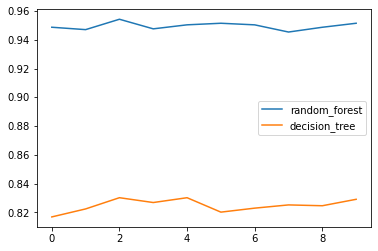

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

cv_list = {'random_forest' : rf_cv_scores, 'decision_tree':dt_cv_scores}
df = pd.DataFrame(cv_list)
df.plot()
plt.show()

---
# 보팅(voting) 앙상블
: 단일 모델을 앙상블하여 더나은 예측을 하는 모델 생성

### 단일 모델 정확도 측정

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [57]:
# 의사결정나무
dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train,y_train)
dtree_score = dtree.score(X_test, y_test)
print("dtree : ",dtree_score)

dtree :  0.8611111111111112


In [59]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train,y_train)
knn_scores = knn.score(X_test, y_test)
print("KNN : ",knn_scores)

KNN :  0.9861111111111112


In [68]:
# SVMM
from sklearn.svm import SVC
svm = SVC(probability=True).fit(X_train, y_train)
svm_score = svm.score(X_test, y_test)
print("SVM :", svm_score)

SVM : 0.9888888888888889



### 하드 보팅
: 각각의 분류기의 예측값들을 모아, 가장 많은 득표를 받은 예측값으로 최종 결론을 내는 방식이다.

In [64]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators=[('decision_tree',dtree),('knn',knn),('svm',svm)],
    # 기울기 weight(가중치)
    weights=[1,1,1],
    voting='hard'
).fit(X_train, y_train)

voting_clf.score(X_test, y_test)

0.9888888888888889

### 소프트 보팅
: 각각의 분류모델을 활용하여 모든 분류값들의 확률들을 더해서 가장 높은 점수를 획득한 분류값으로 내는 방식이다.

In [69]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators=[('decision_tree',dtree),('knn',knn),('svm',svm)],
    # 기울기 weight(가중치)
    weights=[1,1,1],
    voting='soft'
).fit(X_train, y_train)

voting_clf.score(X_test, y_test)

0.9805555555555555